탐색적 데이터 분석 Exploratory Data Analysis를 해보자.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = './data/'
p1= pd.read_csv(path+'users.csv')
p2= pd.read_csv(path+'books.csv')
p3= pd.read_csv(path+'train_ratings.csv')
p4= pd.read_csv(path+'sample_submission.csv')
p5= pd.read_csv(path+'test_ratings.csv') # test와 sample은 완벽하게 동일하다.
users  =p1
books  =p2
train  =p3
sample =p4
test   =p5

print('users shape: ', users.shape) 
print(users.columns)#유저id, 지역, 나이
print('books shape: ', books.shape)
print(books.columns)#isbn(책번호), 제목, 저자, 출판년도, 출판사, img주소, 언어, 범주, 요약, img경로
print('train shape: ', train.shape) 
print(train.columns)# 유저 id, 책isbn, 평점

users shape:  (68092, 3)
Index(['user_id', 'location', 'age'], dtype='object')
books shape:  (149570, 10)
Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')
train shape:  (306795, 3)
Index(['user_id', 'isbn', 'rating'], dtype='object')


In [4]:
print('유저 데이터에 없는 학습, 테스트 데이터 유저가 있는지')
print(len(set(test['user_id']) - set(users['user_id'])))
print(len(set(train['user_id']) - set(users['user_id'])))
#모든 데이터 속 유저는 유저셋에 들어있다.

print('평점 없는 아무개들')
print(len(set(users['user_id']) - set(train['user_id']))) 
#평점 없는 아무개들. 이들의 정보가 필요한가?
# 이들의 결측률도 봐야겠다.

#일단 콜드 스타트부터 파악하는 과정이 필요하다.
print('평점 정보가 없는 테스트 유저 수')
print(len(set(test['user_id']) - set(train['user_id'])))

#이 두 정보의 차이는? 평점이 없지만 테스트셋에 포함되지 않은 소수.
#이런 유저에 대해서 이웃 유저를 찾아주기에는 주어진 속성이 너무 적다. 
#해당 책에 내려진 평점을 토대로 추측



print('책 데이터에 없는 학습, 테스트 데이터 책이 있는지')
print(len(set(train['isbn']) - set(books['isbn'])))
print(len(set(test['isbn']) - set(books['isbn'])))

print('평점 없는 책')
print(len(set(books['isbn']) - set(train['isbn'])))

print('평점 없는 테스트 책 수')
print(len(set(test['isbn']) - set(train['isbn'])))
# 이번에는 차이가 없다. 정보가 없는 책들은 전부 테스트셋에 들어갔다는 뜻이다.
# 빌려진 적 없는 책들이라 치자. 이 책들에 대한 선호도는? 책의 이웃은 찾을 수 있을 것 같다.

#먼저 정보가 없는 유저라면? 그 책에 내려지는 전반적인 평점으로
#만약 정보가 없는 책을 빌린다면? 그 유저가 내리는 전반적인 평점으로

#콜드 스타트 유저와 책을 해결해야 하지만, 한편으로 다독자와 아닌 사람도 구분해야 한다.
#RMSE는 이상치에 민감하기 때문에 이상치를 낼 만한 사람들을 걸러주는 것이 관건이 될 것 같다.
#제공된 모델들은 이를 어떻게 처리하고 있는 것일까? 이미 잘 하고 있는 것인가?
#일단 딥러닝 모델은 단순하게 평점만을 가지고 학습을 진행한다.
# 학습셋 안에도 콜드 스타트는 존재하니, 이에 대해 어떤 연산이 이뤄지고 있을 것이다.


유저 데이터에 없는 학습, 테스트 데이터 유저가 있는지
0
0
평점 없는 아무개들
8289
평점 정보가 없는 테스트 유저 수
8266
책 데이터에 없는 학습, 테스트 데이터 책이 있는지
0
0
평점 없는 책
19793
평점 없는 테스트 책 수
19793



# 유저

In [5]:
print(users.nunique()) 
#유저 자체는 중복이 없고, 지역과 나이는 중복이 많다.
print(users.info())
# 지역에 0에 결측이 없다는 듯 말하지만 밑에 돌려보면 있다.
# 나이는 2만 정도 결측.
print(users.describe())
#id에 평균이니 뭐니는 쓸모 없다...만 최소가 0이 아니니 번호 내에 빈 값이 존재하긴 한다.
#평균 나이는 36. 이후에 그래프로 보면 더 나을 듯. 5살과 99살도 있으니 연령대는 다양.

user_id     68092
location    18368
age            91
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68092 entries, 0 to 68091
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   68092 non-null  int64  
 1   location  68092 non-null  object 
 2   age       40259 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.6+ MB
None
             user_id           age
count   68092.000000  40259.000000
mean   139381.329539     36.069873
std     80523.969862     13.842571
min         8.000000      5.000000
25%     69008.750000     25.000000
50%    138845.500000     34.000000
75%    209388.250000     45.000000
max    278854.000000     99.000000


In [5]:
#유저 샘플. 계속 돌려보면서 감을 잡아보라.
users.sample(10)

,user_id,location,age
61616,75801,"forreston, illinois, usa",NaN
7600,199901,"lopez island, washington, usa",35.0
60232,59752,"sweetwater, tennessee, usa",49.0
47046,161386,"alexander, illinois, usa",47.0
55198,96716,"berkeley, california, usa",NaN
5481,33993,"anaheim, california, usa",18.0
24343,271142,"medina, ohio, usa",23.0
52617,29820,"baytown, toscana, usa",NaN
58603,45354,"minneapolis, minnesota, usa",NaN
48393,229666,"harrisburg, pennsylvania, usa",NaN


In [6]:
#isna는 결측일 때 True라는 식의 데이터프레임 반환
users.isna().sum() / len(users)
#지역은 위에서 말했듯 전처리가 필요하다.
#나이는 40퍼가 결측된다.

user_id     0.000000
location    0.000000
age         0.408756
dtype: float64

In [3]:
#이제 지역을 전처리해보자. 사실 이건 이미 구현되어 있어서 직접 할 필요는 없을 것.

#'문자열'로 이뤄진 객체에 대해 .str을 통해 문자열 관련 함수를 쓸 수 있다.
#대표적으로 인덱싱, split, replace, extract, split 등. 웬만한 거 다 된다.
#정규표현식. []안에 드가면 일단 안속 범주에 해당하는 모든 것을 말한다.
# 그 안에서 ^는 not을 의미한다.
if 'location' in users.columns:
	tmp = users['location'].str.replace(r'[^0-9a-zA-Z:,]','') #즉 특수문자 제거!
	users.drop(['location'],axis=1,inplace=True) # 과감하게 버릴 건 버리자.

# def trisplit(x):
# 	a,b,c = x.split(',')
# 	return [a.strip(), b.strip(), c.strip()]
# a= tmp.apply(trisplit) #이건 왜 안 될까. 되게 하려면 어떻게 해야 할까
users['city']= tmp.apply(lambda x: x.split(',')[0].strip())
users['state']= tmp.apply(lambda x: x.split(',')[1].strip())
users['country']= tmp.apply(lambda x: x.split(',')[2].strip())
#시,주,국가로 나누는 과정

users = users.replace('na', np.nan).replace('', np.nan).replace('nan', np.nan)
#na나 빈칸을 결측으로 간주하기 위한 전처리
print(users)


/tmp/ipykernel_73751/503263225.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  tmp = users['location'].str.replace(r'[^0-9a-zA-Z:,]','') #즉 특수문자 제거!


       user_id   age         city            state country
0            8   NaN      timmins          ontario  canada
1        11400  49.0       ottawa          ontario  canada
2        11676   NaN          NaN              NaN     NaN
3        67544  30.0      toronto          ontario  canada
4        85526  36.0     victoria  britishcolumbia  canada
...        ...   ...          ...              ...     ...
68087   278376  54.0     danville     pennsylvania     usa
68088   278621  74.0     victoria         delaware  canada
68089   278636   NaN    irvington          alabama     usa
68090   278659  33.0    vancouver       washington     usa
68091   278713  63.0  albuquerque        newmexico     usa

[68092 rows x 5 columns]


In [8]:
users.isna().sum()/len(users)
#상대적으로 지역은 결측치가 적다. 중복되게 count됐으니 더 적을 것이다.
#의미가 있을 경우, 지역을 유저 속성으로 활용할 수 있다.

user_id    0.000000
age        0.408756
city       0.001792
state      0.047788
country    0.031193
dtype: float64

In [9]:
#사실 도시를 안다면 주를 알 수 있고, 주를 알면 국가를 알 수 있다.
#물론 주어진 데이터 내에서 해내려면 다른 유저의 정보가 필요하다.
#이를 처리해보려고 했는데, 생각보다 어렵다. 
lst = dict()
for i, j in zip(users['city'], users['state']):
	if not pd.isna(i) and not pd.isna(j): lst[i] = j
for k, (i, j) in enumerate(zip(users['city'], users['state'])):
	if i in lst.keys() and pd.isna(j):
		users.iloc[k]['state'] = lst[i]

users.isna().sum()/len(users)
#실패한 코드. 나중에 다시 해결방법을 생각해보자.

/tmp/ipykernel_42753/3072011948.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users.iloc[k]['state'] = lst[i]


user_id    0.000000
age        0.408756
city       0.001792
state      0.047788
country    0.031193
dtype: float64

In [4]:
modify = users[(users['country'].isna())&(users['city'].notnull())]['city'].values

print(users['city'].value_counts().index[0])
print(modify)
users[users['city'] == modify[0]]['city'].value_counts().index

london
['ottawa' 'seattle' 'albuquerque' ... 'sammamish' 'calgary' 'bolligen']


Index(['ottawa'], dtype='object')

In [5]:
modify = users[(users['country'].isna())&(users['city'].notnull())]['city'].values
#나라는 없는 주제에 도시는 있는 놈들의 도시의 값들을 저장함.
users[users['city'].str.contains('seattle') & users['country'].notnull()]
#왜 인지는 모르겠지만 시애틀이란 도시에 사는 놈들 중 국가도 잘 표기한 놈들

#location = users[(users['location'].str.contains('seattle'))&(users['location_country'].notnull())]['location'].value_counts().index[0]
#이 코드가 무얼 뜻하는지 잘 모르겠다.

#value_counts는 해당 series의 고유한 값들을 인덱스로 삼고 갯수를 값으로 가지는 sereis를 반환한다.
location_list = []
for i in modify:
	try:
		#value_counts는 각 고유한 값들의 분포를 나타내준다.
		tmp = users[users['city'].str.contains(i) & users['country'].notnull()]
		city_tmp = tmp['city'].value_counts().index[0]
		state_tmp = tmp['state'].value_counts().index[0]
		country_tmp = tmp['country'].value_counts().index[0]
		location_list.append((city_tmp, state_tmp, country_tmp))
		#
	except: pass

In [6]:
#loc은 인덱스 단위로 행 접근, iloc은 행번호 단위로 행 접근. 
#인덱스는 우리가 지정해주는 값이다. 그래서 정수가 아니어도 됨.
#행번호는 말그대로 행의 순서대로 부여되는 번호이다.

for location in location_list:
    users.loc[users[users['city']==location[0]].index,'state'] = location[1]
    users.loc[users[users['city']==location[0]].index,'country'] = location[2]

In [12]:
#이제 오랜 시간은 그만. 그냥 파일로 저장하자.
import os
if not os.path.isfile('/opt/ml/input/code/pre_users.csv'):
	users.to_csv('/opt/ml/input/code/pre_users.csv', index=False)

In [7]:
users.isna().sum()/len(users)
#도시를 기준으로 값을 메꿨다. 주는 많이 줄지 않았지만 국가는 확실하게 결측이 줄어든 모습이다.

user_id    0.000000
age        0.408756
city       0.001792
state      0.016346
country    0.003510
dtype: float64

In [14]:
#정말 이 정도로 충분한가? 더 결측값을 없앨 수도 있다.
users[users['state'].isna()][['city', 'state', 'country']]

,city,state,country
2,NaN,NaN,NaN
633,malmok,NaN,aruba
867,mtairy,NaN,usa
911,brussels,NaN,belgium
919,manila,NaN,philippines
...,...,...,...
68007,macau,NaN,hongkong
68008,rotorua,NaN,newzealand
68052,zrich,NaN,switzerland
68064,rijeka,NaN,croatia


In [15]:
#위에서 본 도시 하나만 골라서 체크하는 과정. 주 역시 zrich로 동일한 경우가 많은데,
#결측돼버린 사람도 있고, 주가 조금 다르게 찍히는 사람도 있다.
users[users['city'] == 'munic']

,user_id,age,city,state,country
30318,237218,32.0,munic,bayern,germany
51587,31247,NaN,munic,bayern,germany
68075,277514,NaN,munic,NaN,germany


In [16]:
users['country'].value_counts()
#usa가 미국인데,  us로 표기된 사람도 있다. 다 일일히 처리하는 방법은 모르겠다.
#하지만 숫자가 적은 데이터를 퉁칠 수는 있다.

usa              45335
canada            6402
germany           3602
unitedkingdom     3152
australia         1800
                 ...  
palau                1
mongolia             1
unitedstaes          1
unknown              1
nz                   1
Name: country, Length: 263, dtype: int64

In [17]:
# users[users['country'].value_counts() < 10]

#특정 소수만 뽑아내는 방법. 일단 valuecount데이터 프레임 만들기
country_dict = users['country'].value_counts().to_dict()
country_count = pd.DataFrame(country_dict.items(), columns=['country', 'count'])

tmp = country_count[country_count['count'] <100]['country'].values # 이제 5개 이하의 국가들 알아냈다.
user = users.copy() #혹시 몰라서 복사해서 사용함.
user.loc[users[users['country'].isin(tmp)].index, 'country'] = 'others'

user.loc[user[user['country'] == 'others'].index, 'state'] = 'others'
# user.loc[user[user['country'] == 'others'].index, 'city'] = 'others'
user['city'].where(user['country'] != 'others', 'others', inplace=True)

#############################################################
users = user.copy()#이 코드로 내 전처리가 적용된다.
############################################################


#생각보다  other로 퉁치니까 너무 많다. 처음에는 100 이하면 다 했는데, 
#이렇게 하는게 맞는 건가 싶다.
#역시 us를 usa로 넣는 방법을 강구해보는 것도 좋을 것 같다.
users[users['country'] != 'others']

,user_id,age,city,state,country
0,8,NaN,timmins,ontario,canada
1,11400,49.0,ottawa,ontario,canada
2,11676,NaN,NaN,NaN,NaN
3,67544,30.0,toronto,ontario,canada
4,85526,36.0,victoria,britishcolumbia,canada
...,...,...,...,...,...
68087,278376,54.0,danville,california,usa
68088,278621,74.0,victoria,britishcolumbia,canada
68089,278636,NaN,irvington,alabama,usa
68090,278659,33.0,vancouver,britishcolumbia,canada


<AxesSubplot: xlabel='age'>

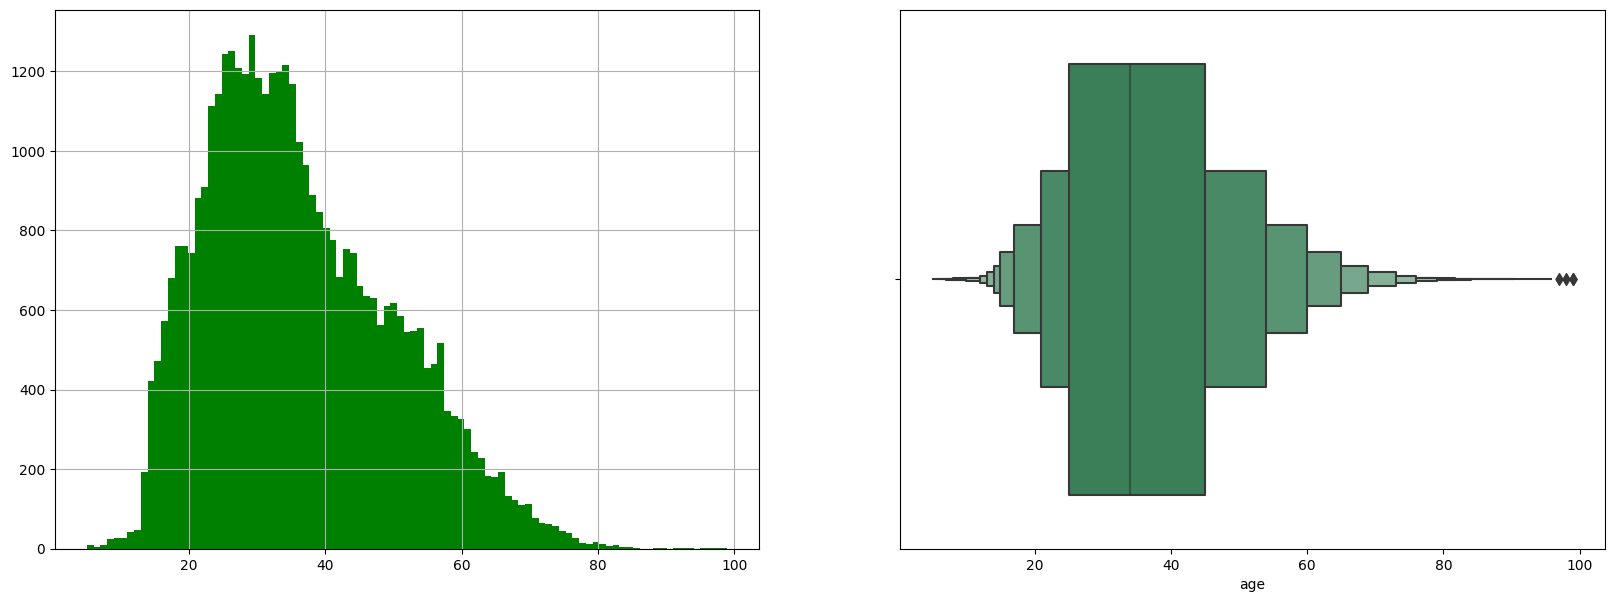

In [18]:
fig, ax = plt.subplots(1,2,figsize=(20,7))

#bins는 데이터를 smoothing할 비율인 듯.
users['age'].hist(bins=95, color='green', ax=ax[0])
sns.boxenplot(data=users, x='age', color='seagreen',ax=ax[1])
#박스플롯

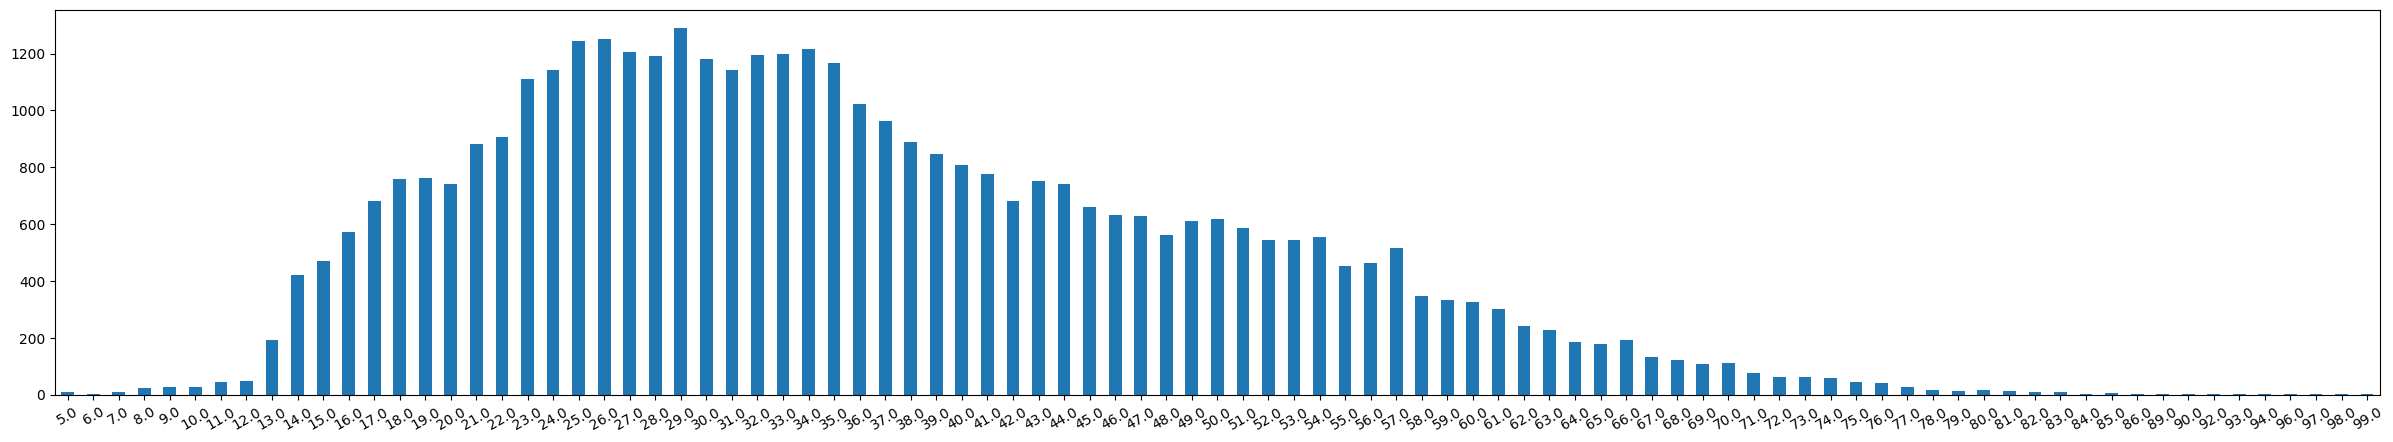

In [19]:
plt.figure(figsize=(30,5))
users['age'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=30)
plt.show()
#2,30대로 갈수록 많아지는 완만한 형태

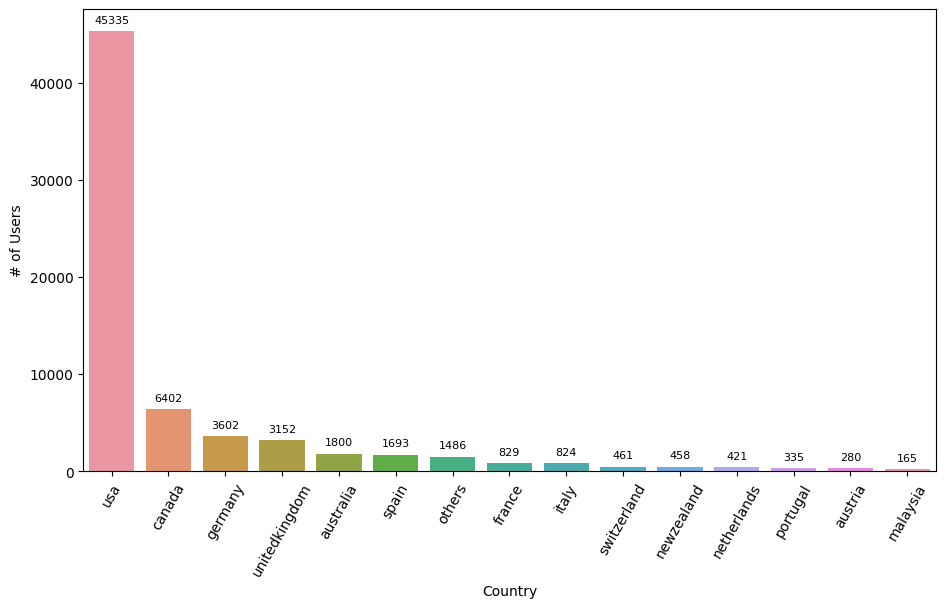

In [20]:
my_dict=(users['country'].value_counts()).to_dict() #간단하게 딕트로 만들기.
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15) #많은 국가 15개만
# f.drop(7,inplace=True)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()
# 국가는 언어와 연관된다. 
# 스페인까지만 제대로 고려해도 될 듯하다.

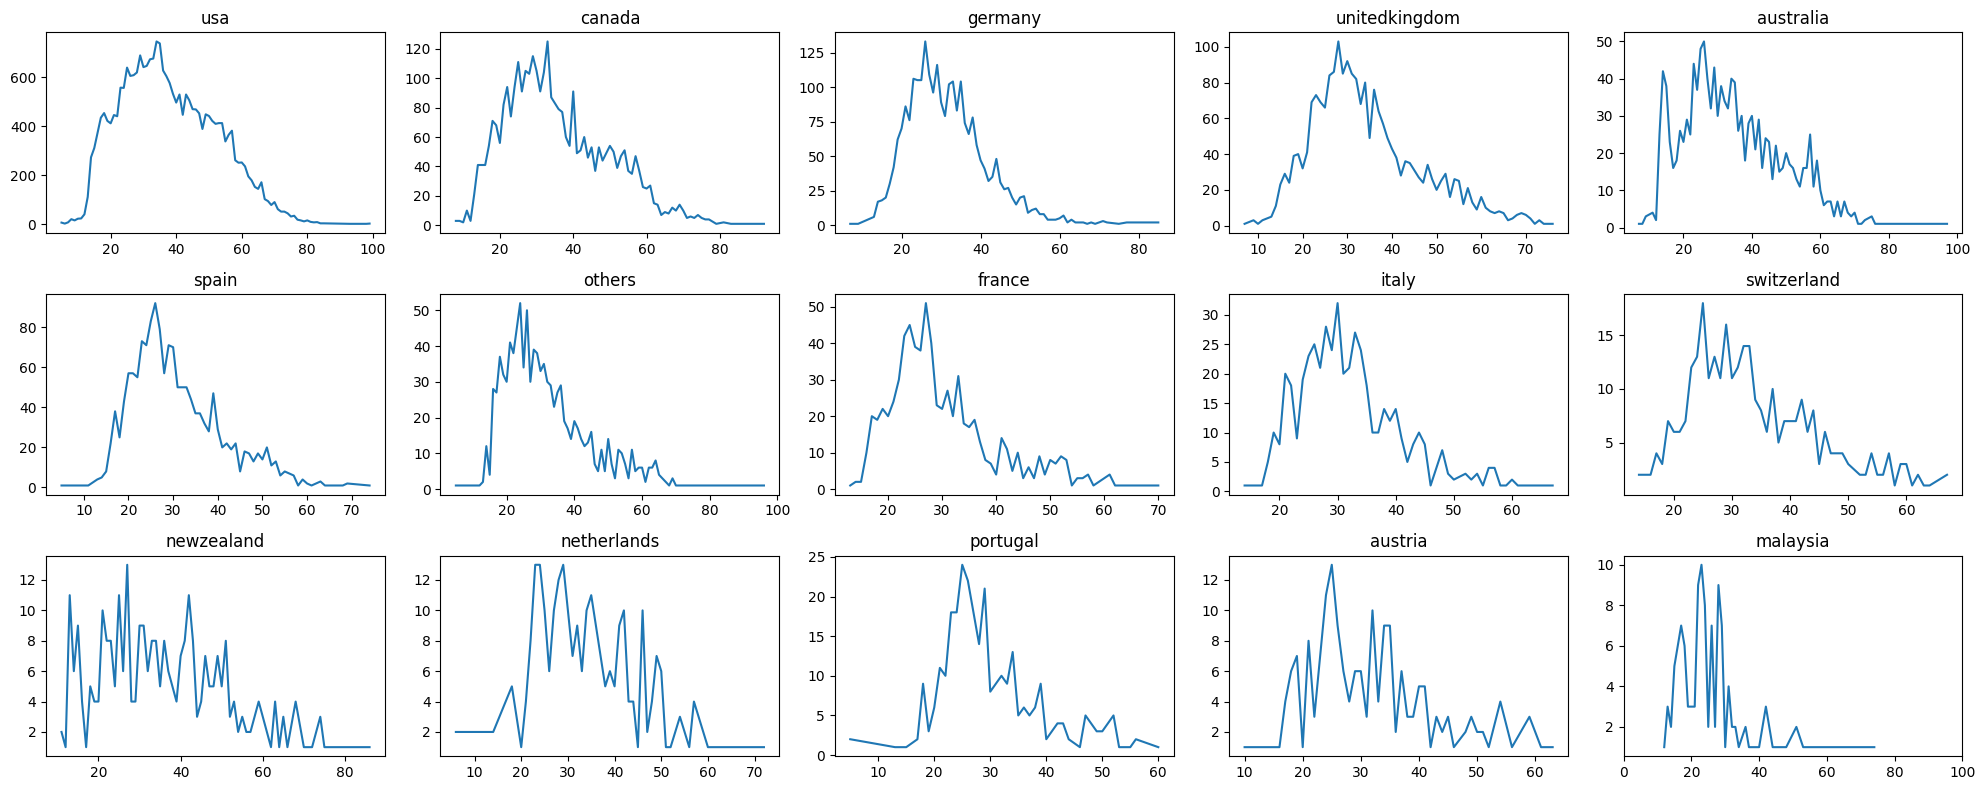

In [21]:
fig, ax = plt.subplots(3,5,figsize=(20,8))
for country, ax_ in zip(f['country'], ax.flatten()):
    users[(users['country']==country)]['age'].value_counts().sort_index().plot(ax=ax_, title=country)
plt.xlim(0,100)
plt.tight_layout()
plt.show()
#스페인 정도 급 되지 않는 이상 보이는 그래프를 믿을 필요 없다고 생각한다. 

In [22]:
users[users['age'].isna()]['country'].value_counts()

usa              20276
canada            3103
germany           1105
unitedkingdom      952
australia          471
others             445
italy              328
netherlands        159
newzealand         147
switzerland        143
spain              115
france              97
austria             96
ireland             56
sweden              55
singapore           47
malaysia            46
portugal            37
belgium             20
brazil              11
Name: country, dtype: int64

In [85]:
#국가별 결측치에 대한 시각화
my_dict=(users[users['age'].isna()]['country'].value_counts()).to_dict()
count= pd.DataFrame(list(my_dict.items()),columns = ['country','count'])
f = count.sort_values(by=['count'], ascending = False)
f = f.head(15)
fig=plt.figure(figsize=(11,6))
ax = sns.barplot(y = 'count',x= 'country' , data = f)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60,horizontalalignment='center')
for bar in ax.patches: 
    ax.annotate(format(bar.get_height(), '.0f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=8, xytext=(0,8), 
                   textcoords='offset points') 

plt.xlabel("Country", size=10)
plt.ylabel("# of Users", size=10)
plt.show()
#결측치는 국가별로 고르게 나타난다.

ValueError: min() arg is an empty sequence

<Figure size 1100x600 with 0 Axes>

국가별 결측값이 조금 다르다. 그러나 전체 데이터 중에서는 매우 적은 값이라 이런 차이 자체는 무시해도 괜찮지 않을까 한다. 그렇다면 이 결측치를 어떻게 메꿀 수 있을까?

In [79]:
age_na = users[users['age'].notna()]['age'].tolist()
users['age'].where(users['age'].notna(), np.random.choice(age_na), inplace=True)

결측치를 채울 방법. 나온 분포를 그대로 확률 분포로 써서 random.choice로 채울 수 있지 않을까? 나이대의 이상치가 그다지 없어서 완전 평균을 사용해도 문제는 없을 것 같다. 

확인해볼 사항. 나이대별로, 혹은 국가 별로 다른 평점을 매기고 있지는 않은가?

In [25]:
print(books.shape)
books.columns

(149570, 10)


Index(['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher',
       'img_url', 'language', 'category', 'summary', 'img_path'],
      dtype='object')

In [26]:
books[['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher','language', 'category', 'summary']].sample(10)


,isbn,book_title,book_author,year_of_publication,publisher,language,category,summary
36546,0670843342,The Road to Wellville,T. Coraghessan Boyle,1993.0,Penguin USA,en,['Fiction'],Focuses on the great American breakfast food a...
38606,0140028382,Dog years,GÃ?Â¼nter Grass,1969.0,Penguin in association with Secker and Warburg,NaN,NaN,NaN
142112,9501515362,Corazones En Llamas,Johanna Lindsey,1995.0,Vergara Editor S.A.,NaN,NaN,NaN
107692,038097889X,Mumbo Gumbo: A Madeline Bean Novel,Jerrilyn Farmer,2003.0,William Morrow,en,['Fiction'],With two straight number one Los Angeles Times...
93389,031228585X,Street Money: A Mystery,Bill Kent,2002.0,St. Martin's Minotaur,NaN,NaN,NaN
134985,0805050876,Etty Hillesum: An Interrupted Life the Diaries...,Etty Hillesum,1996.0,Owl Books,en,['Biography & Autobiography'],"For the first time, Etty Hillesum&#39;s diary ..."
23547,158827523X,Anabasis,Xenophon,2001.0,IndyPublish.com,NaN,NaN,NaN
78810,0486230007,The bread tray;: Nearly 600 recipes for homema...,Louis Pullig De Gouy,1974.0,Dover Publications,en,['Bread'],Over five hundred recipes from around the worl...
105933,0590228595,"Endangered Animals (Hello Reader! (DO NOT USE,...",Faith McNulty,1996.0,Scholastic,en,['Juvenile Fiction'],Discusses the changes in animal habitats and t...
114873,0304358738,Brewer's Dictionary of Phrase and Fable,E.Cobham Brewer,2001.0,Cassell reference,en,['Allusions in literature'],"Provides 19,000 definitions of typical phrases..."


In [27]:
print(books.nunique())
#isbn, img는 죄다 고유하다. 
print(books.isna().sum())
#언어, 범주, 요약은 많이 결측돼있다. 이건 전처리로 함부로 채울 수 없을 것 같다.
#언어와 요약은 수가 같은 것으로 보아 같이 결측되는 듯. 확인해보자

isbn                   149570
book_title             135436
book_author             62059
year_of_publication        95
publisher               11571
img_url                149570
language                   26
category                 4292
summary                 79872
img_path               149570
dtype: int64
isbn                       0
book_title                 0
book_author                0
year_of_publication        0
publisher                  0
img_url                    0
language               67227
category               68851
summary                67227
img_path                   0
dtype: int64


In [28]:
books[books['language'].isna() & books['summary'].notna()]
#완벽히 결측은 일치한다.

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path


In [29]:
books[books['category'].isna() & books['summary'].isna()].shape
#요약이나 언어가 없는 데이터는 전부 범주도 없다.
#요약이 있으면서 범주 없는 데이터가 차이만큼 존재한다는 것이기도 하다.


(67227, 10)

In [30]:
#출판사
publisher_dict=(books['publisher'].value_counts()).to_dict()
publisher_count_df= pd.DataFrame(list(publisher_dict.items()),columns = ['publisher','count'])


In [31]:
print(publisher_count_df.shape)
publisher_count_df.head()

(11571, 2)


,publisher,count
0,Harlequin,3005
1,Ballantine Books,2322
2,Pocket,2274
3,Penguin Books,1943
4,Bantam Books,1938


In [32]:
tmp = books['publisher'].value_counts().index
(tmp)

Index(['Harlequin', 'Ballantine Books', 'Pocket', 'Penguin Books',
       'Bantam Books', 'Berkley Publishing Group', 'Silhouette',
       'Warner Books', 'Scholastic', 'Simon & Schuster',
       ...
       'Cauldron Publications', 'Heinemarnn Educational', 'Llar de Llibre',
       'Highlights for Children', 'Sundance', 'Ediciones XandrÃ³',
       'Ediciones Xandro', 'Marlboro Press', 'Anatolian Treasures',
       'American Map Corporation'],
      dtype='object', length=11571)

In [33]:
books[books['publisher']=="Penguin Books"].head()
#펭귄 책 출판사는 isbn이 014로 시작한다.

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
68,0140067477,The Tao of Pooh,Benjamin Hoff,1983.0,Penguin Books,http://images.amazon.com/images/P/0140067477.0...,en,['Humor'],An expert in Chinese philosophy explains facet...,images/0140067477.01.THUMBZZZ.jpg
119,0143034359,Thursday Next in the Well Of Lost Plots (Thurs...,Fforde Jasper,2004.0,Penguin Books,http://images.amazon.com/images/P/0143034359.0...,en,['Fiction'],Exhausted by her stint as Miss Havisham&#39;s ...,images/0143034359.01.THUMBZZZ.jpg
157,0140250964,Snow Angels,Stewart O'Nan,1995.0,Penguin Books,http://images.amazon.com/images/P/0140250964.0...,en,['Fiction'],Weaves together two stories in the account of ...,images/0140250964.01.THUMBZZZ.jpg
196,0140272100,Vanished,Mary McGarry Morris,1997.0,Penguin Books,http://images.amazon.com/images/P/0140272100.0...,en,['Fiction'],Aubrey Wallace is the kind of man no one notices.,images/0140272100.01.THUMBZZZ.jpg
298,014028009X,Bridget Jones's Diary,Helen Fielding,1999.0,Penguin Books,http://images.amazon.com/images/P/014028009X.0...,en,['Fiction'],This witty national bestseller is now availabl...,images/014028009X.01.THUMBZZZ.jpg


In [34]:
books[books['isbn'].str.startswith('014')].sample(5)
#그래서 014로 isbn 찍어보니.. 출판사 이름이 조금씩 다르게 표기되어 있다. 통일시킬 수 있다.

,isbn,book_title,book_author,year_of_publication,publisher,img_url,language,category,summary,img_path
49828,014038006X,The Dark Secret of Weatherend (Anthony Monday ...,John Bellairs,1997.0,Penguin USA,http://images.amazon.com/images/P/014038006X.0...,en,['Juvenile Fiction'],"Fourteen-year-old Anthony Monday of Hoosac, Mi...",images/014038006X.01.THUMBZZZ.jpg
43344,0140311084,The Worst Witch (Puffin Books),Jill Murphy,1991.0,Penguin USA,http://images.amazon.com/images/P/0140311084.0...,en,['Juvenile Fiction'],In her first year at Miss Cackle&#39;s Academy...,images/0140311084.01.THUMBZZZ.jpg
52373,0140350136,The Lost World (Puffin Classics),Sir Arthur Conan Doyle,1983.0,Puffin Books,http://images.amazon.com/images/P/0140350136.0...,NaN,NaN,NaN,images/0140350136.01.THUMBZZZ.jpg
38610,0140035877,Sunlight on Cold Water,Francoise Sagan,1978.0,Viking Press,http://images.amazon.com/images/P/0140035877.0...,en,['France'],But back in Paris her innate goodness contrast...,images/0140035877.01.THUMBZZZ.jpg
134501,0140279040,A LITERARY GUIDE TO LONDON,Ed Glinert,2000.0,Penguin Books,http://images.amazon.com/images/P/0140279040.0...,NaN,NaN,NaN,images/0140279040.01.THUMBZZZ.jpg


In [35]:
print((books['publisher'].nunique()))
#통일시키기 전

11571


In [36]:
modify_list = publisher_count_df[publisher_count_df['count']>1].publisher.values
#1개만 낸 출판사는 이름이 잘못됐을 것이라 가정.
print(modify_list.shape)
for publisher in modify_list:
    try:
        number = books[books['publisher']==publisher]['isbn'].apply(lambda x: x[:4]).value_counts().index[0]
		#출판사의 isbn 앞자리
        right_publisher = books[books['isbn'].apply(lambda x: x[:4])==number]['publisher'].value_counts().index[0]
		#그 출판사의 이름
        books.loc[books[books['isbn'].apply(lambda x: x[:4])==number].index,'publisher'] = right_publisher
    except: 
        pass

(5276,)


In [37]:
print((books['publisher'].nunique()))
books['publisher'].unique()
#이런 전처리는 베이스에 구현되어 있지 않다. 우리가 해준다면 성능 향상을 기대할 수 있을까?


1521


array(['Collins', 'Perennial', 'Farrar Straus Giroux', ..., 'M. Niemeyer',
       'Bollati Boringhieri', 'Information'], dtype=object)

In [38]:
import re

#re.sub(정규표현식, 치환 문자, 대상 문자열) replace해준다.
#\W는 알파벳, 숫자, _가 아닌 모든 문자, 즉 특수문자! +는 반복이 있을 수 있다는 것을 뜻한다.
books.loc[books[books['category'].notnull()].index, 'category'] = \
	books[books['category'].notnull()]['category'].apply(lambda x: re.sub('[\W_]+',' ',x).strip())
books['category'] = books['category'].str.lower()


In [39]:
books['category'].value_counts()


fiction                                            33016
juvenile fiction                                    5835
biography autobiography                             3326
history                                             1927
religion                                            1818
                                                   ...  
brenner simon fictitious character                     1
gone with the wind motion picture 1939                 1
disguise                                               1
country lawyers                                        1
authors canadian english 20th century biography        1
Name: category, Length: 4105, dtype: int64

In [40]:
category_df = pd.DataFrame(books['category'].value_counts()).reset_index()
category_df.columns = ['category','count']
category_df[category_df['count']<30] # 다른 범주들이 붙여져서 만들어진 범주도 있는 듯하다.
#또한 범주에 그냥 지역을 나타내는 경우도 있다.
#텍스트 데이터를 다루는 함수를 통해 이것을 교정할 수 있지 않을까? 

,category,count
113,british,27
114,christian fiction,27
115,child rearing,26
116,china,26
117,indians of north america,26
...,...,...
4100,brenner simon fictitious character,1
4101,gone with the wind motion picture 1939,1
4102,disguise,1
4103,country lawyers,1


In [41]:
books['category_high'] = books['category'].copy()

categories = ['garden','crafts','physics','adventure','music','fiction','nonfiction','science','science fiction','social','homicide',
 'sociology','disease','religion','christian','philosophy','psycholog','mathemat','agricult','environmental',
 'business','poetry','drama','literary','travel','motion picture','children','cook','literature','electronic',
 'humor','animal','bird','photograph','computer','house','ecology','family','architect','camp','criminal','language','india',
 'history']

for category in categories:
    books.loc[books[books['category'].str.contains(category,na=False)].index,'category_high'] = category

In [42]:
category_high_df = pd.DataFrame(books['category_high'].value_counts()).reset_index()
category_high_df.columns = ['category','count']
print(category_high_df.tail(10)) # 이상한 놈들은 아직 남아있는 듯하다.

                                             category  count
3252                                          pottery      1
3253                                       radicalism      1
3254                   actors united states portraits      1
3255        digriz james bolivar fictitious character      1
3256                                           shells      1
3257              heller jettero fictitious character      1
3258                                     persian gulf      1
3259                                     outdoor life      1
3260                                    procedure law      1
3261  authors canadian english 20th century biography      1


In [43]:
others_list = category_high_df[category_high_df['count']<5]['category'].values
#5개 이하는 그냥 묶어버리기

In [44]:
books.loc[books[books['category_high'].isin(others_list)].index, 'category_high']='others'


In [45]:
print(books['category'].nunique())
print(books['category_high'].nunique())


4105
413


In [46]:
books.describe()


,year_of_publication
count,149570.000000
mean,1994.590606
std,8.179733
min,1376.000000
25%,1991.000000
50%,1996.000000
75%,2000.000000
max,2006.000000


손대야 할 것이 책 쪽에서는 굉장히 많다. 일일히 전처리를 할 수 있으면 좋을 것 같다. 범주는 적절하게 줄일 수 있는 게 베스트. 그러면서 적절한 범주에 넣는 것은 중요할 것이다.


In [47]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
#이미지 시각화해보기

41622


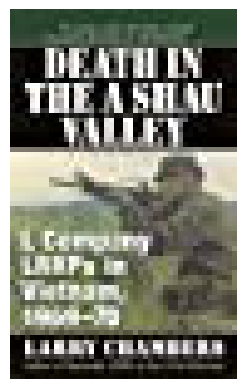

In [48]:
fig= plt.plot(figsize=(3,4))
rd = np.random.randint(0, len(books))
print(rd)
url = books['img_url'][87666]
img = np.asarray(Image.open(requests.get(url, stream=True).raw))
plt.axis("off")
plt.imshow(img)
#없는 이미지가 있는 듯하다. 86999를 넘어가면 그냥 보라화면
#이건 url을 활용해서 이미지를 띄우는 방식이다.

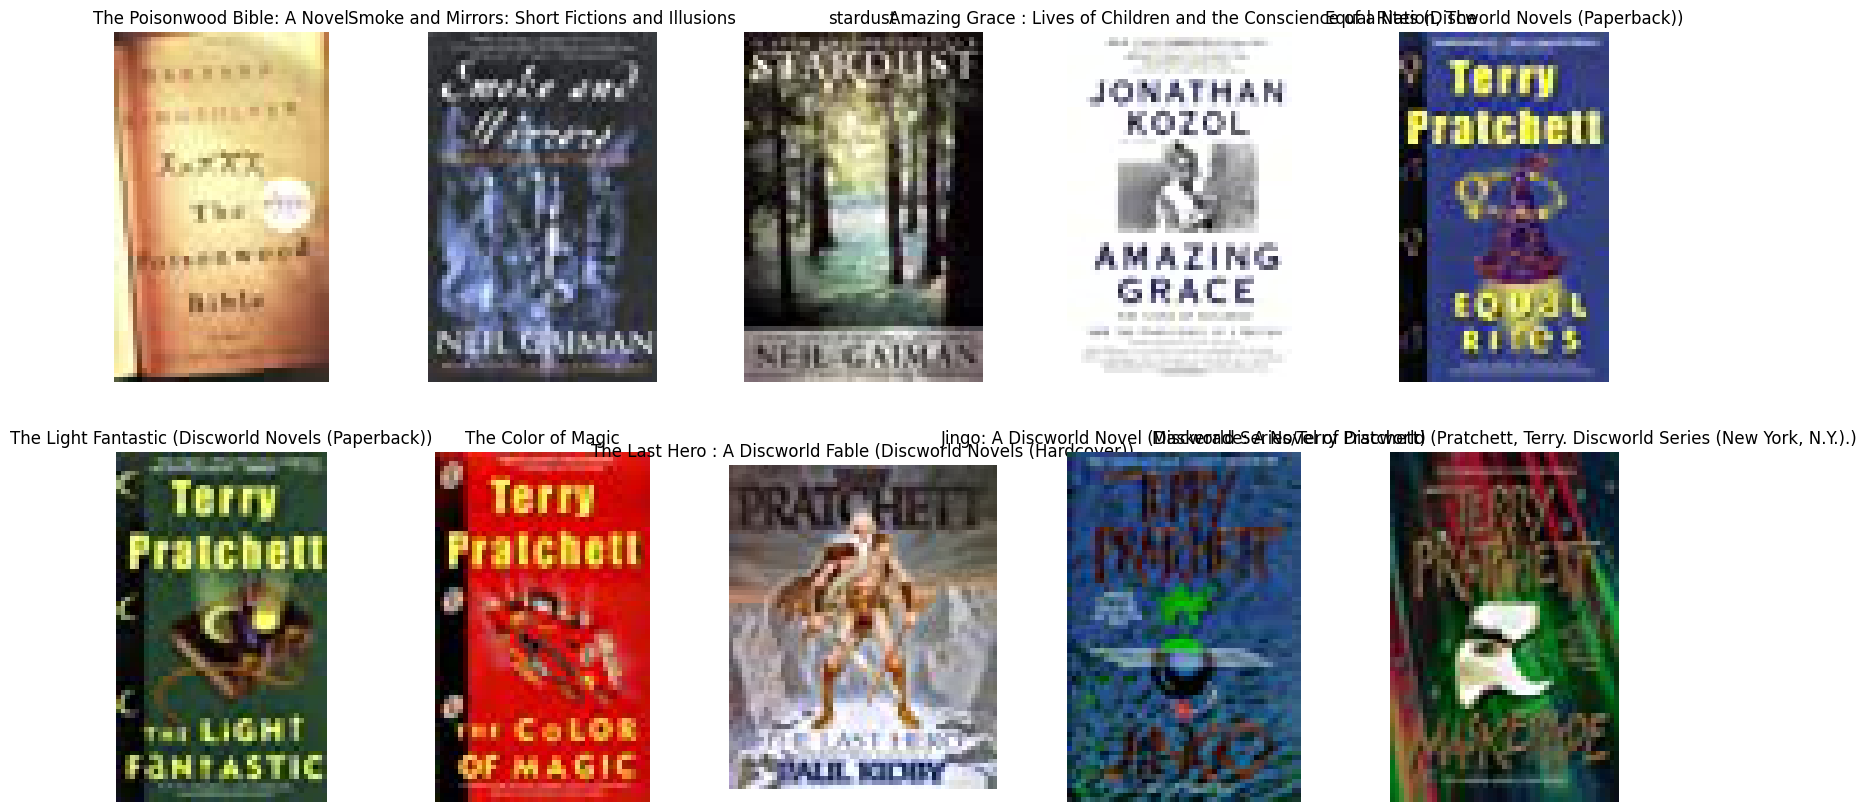

In [49]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10)) 
image_path = './data/'
for i, ax in zip(range(280, 290), ax.flatten()):
    file_path = image_path+books['img_path'][i]
    img = np.asarray(Image.open(file_path))
    ax.imshow(img)
    ax.axis("off")
 
    ax.set_title(books['book_title'][i])

fig.show()


85019
File Size: 43 bytes
File Size: 1760 bytes


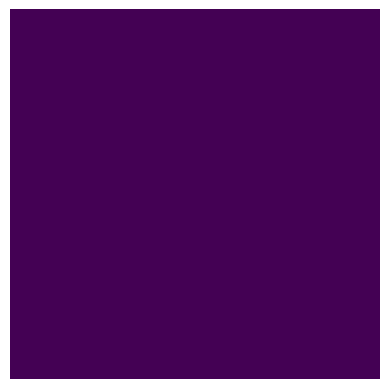

In [50]:
import os
fig= plt.plot(figsize=(3,4))
rd = np.random.randint(0, len(books))
print(rd)
file_path = image_path+books['img_path'][rd]
img = np.asarray(Image.open(file_path))
plt.axis("off")
plt.imshow(img)
# print(image_path+books['img_path'][136803])
file_size = os.path.getsize('./data/images/0380708698.01.THUMBZZZ.jpg') 
print('File Size:', file_size, 'bytes') # 없는 이미지
file_size = os.path.getsize('./data/images/0310232716.01.THUMBZZZ.jpg') 
print('File Size:', file_size, 'bytes') # 있는 이미지

In [51]:
file_list = os.listdir("./data/images/")
rm_list = []
for i in file_list:
    file_size = os.path.getsize('./data/images/'+i)
    if file_size < 500: 
        rm_list.append('./data/images/'+i)
print(len(rm_list))


41896


In [52]:
import os
os.listdir("./submit")

['20221026_155427_donggun.csv',
 '20221026_094214_FFM.csv',
 '20221026_094214_FFM-20221025_085059_WDN-20221025_073849_FM-20221026_094323_NCF-20221026_094434_DCN-aw.csv',
 '20221026_093829_DeepCoNN.csv',
 '20221026_151921_FFM.csv',
 '20221026_154337_donggun.csv',
 '20221025_085059_WDN.csv',
 '20221026_152246_NCF.csv',
 '20221027_031243_donggun.csv',
 '20221026_094925_CNN_FM.csv',
 '20221026_162827_donggun.csv',
 '20221027_005211_donggun-20221026_170733_donggun-aw.csv',
 '20221026_170733_donggun.csv',
 '20221027_005211_donggun.csv',
 '20221026_151632_donggun.csv',
 '20221025_073849_FM.csv',
 '20221026_094214_FFM-20221026_093829_DeepCoNN-20221025_085059_WDN-20221026_094925_CNN_FM-20221025_073849_FM-20221026_094323_NCF-20221026_094434_DCN-aw.csv',
 '20221026_161740_donggun.csv',
 '20221026_094323_NCF.csv',
 '20221026_094434_DCN.csv']

In [53]:
# python ensemble.py --ENSEMBLE_FILES 20221026_094214_FFM,20221025_085059_WDN,20221025_073849_FM,20221026_094323_NCF,20221026_094434_DCN